# Final Project
## Authors:
- Taylor Tucker
- Tina Jin
- Virginia Weston
- Tina Jin

## Implementing PCA for our dataset

Import Statements

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from scipy.spatial.distance import pdist, squareform
from scipy.linalg import eigh
from sklearn.datasets import make_moons
from sklearn.datasets import make_circles
from sklearn.decomposition import KernelPCA

Importing the dataset

In [2]:
df = pd.read_csv("./cleaned_data_discreet.csv")


Splitting the data into 70% training and 30% test subsets.

In [3]:
X, y = df.iloc[:, 0:-1].values, df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

Standardizing the data.

In [4]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

Eigendecomposition of the covariance matrix.

In [5]:
cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

print('\nEigenvalues \n%s' % eigen_vals)
print('\nEigenvectors \n%s' % eigen_vecs)



Eigenvalues 
[8.20573674e+00 2.18868849e+00 1.66309858e+00 1.31235557e+00
 1.18816206e+00 1.04311479e+00 9.53141805e-01 9.09959681e-01
 8.12520168e-01 5.82277086e-01 3.46609856e-01 2.98657848e-01
 2.35067823e-01 1.70308934e-01 9.31177930e-02 5.91767819e-02
 1.69102170e-04 2.05710450e-02 2.31505270e-02 2.23204472e-02]

Eigenvectors 
[[-2.51247266e-02  8.04325436e-02 -2.46187335e-01  3.37818270e-01
  -2.40865688e-01 -2.82173947e-01  4.17013938e-01 -6.11618491e-01
  -2.60710281e-01 -1.36632089e-01  1.45283281e-01  1.00350900e-01
  -6.20363310e-02 -4.56806705e-02 -8.13926606e-02  2.62590670e-02
   2.93596997e-04  2.41774337e-02  2.49874378e-02  1.67180741e-02]
 [ 2.60290337e-01  4.00300203e-01 -3.73072555e-02 -1.72345067e-03
  -1.74822193e-02  2.40723887e-01 -4.31100377e-02 -2.21694313e-02
  -4.29832160e-02  1.28288600e-01  3.38734256e-02  1.63019800e-02
   5.05088779e-02  2.02864462e-02 -2.90337279e-01  1.52512932e-01
  -1.79005861e-03 -3.32498625e-02 -7.17857386e-02  7.57305128e-01]
 [-

Total and explained variance

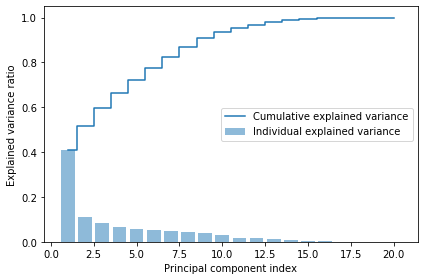

In [6]:
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

plt.bar(range(1, 21), var_exp, alpha=0.5, align='center',
        label='Individual explained variance')
plt.step(range(1, 21), cum_var_exp, where='mid',
         label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.savefig('figs/PCA1.png', dpi=300)
plt.show()

### Feature transformation

Make a list of (eigenvalue, eigenvector) tuples

In [7]:
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i])
               for i in range(len(eigen_vals))]

Sort the (eigenvalue, eigenvector) tuples from high to low

In [8]:
eigen_pairs.sort(key=lambda k: k[0], reverse=True)


w = np.hstack((eigen_pairs[0][1][:, np.newaxis],
               eigen_pairs[1][1][:, np.newaxis]))
print('Matrix W:\n', w)


X_train_std[0].dot(w)

X_train_pca = X_train_std.dot(w)

Matrix W:
 [[-0.02512473  0.08043254]
 [ 0.26029034  0.4003002 ]
 [-0.24426048  0.07802629]
 [ 0.24763052 -0.23969898]
 [ 0.2775311  -0.0935124 ]
 [ 0.21777562  0.45866518]
 [ 0.01920638 -0.00399056]
 [-0.24168929  0.33852602]
 [ 0.23519025 -0.2749683 ]
 [ 0.12619599 -0.32794912]
 [-0.01518634 -0.10446096]
 [ 0.2907015  -0.09047521]
 [ 0.2775346  -0.11980257]
 [ 0.3204896   0.19960783]
 [ 0.31103271  0.26032818]
 [ 0.22361583  0.13534292]
 [ 0.27804637  0.13014347]
 [-0.07653684  0.10126983]
 [ 0.06588249 -0.18318484]
 [-0.23964731  0.18089359]]


Plotting

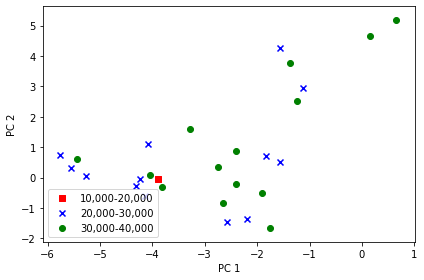

In [9]:
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train == l, 0],
                X_train_pca[y_train == l, 1],
                c=c, label=l, marker=m)

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.savefig('figs/PCA2.png', dpi=150)
plt.show()